In [ ]:
###1.1.SCIPY###

In [80]:
import numpy as np
from scipy import linalg
from scipy.linalg import solveh_banded
from scipy.linalg import eig
from scipy.linalg import inv
from scipy.linalg import norm

In [63]:
# a. Define a matrix a

A = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])
ab=np.array(A)

print(ab)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [64]:
# b. Define a vector b

In [65]:
b = np.array([1, 2, 3])
print(b)

[1 2 3]


In [66]:
#  c. Solve the linear system of equations A x = b
x=solveh_banded(ab, b)
x

array([ 1.08771214e-16, -2.11027179e-16,  3.33333333e-01])

In [67]:
# d. Check that your solution is correct by plugging it into the equation

In [68]:
check=x**2
print(check)


[1.18311769e-32 4.45324705e-32 1.11111111e-01]


In [69]:
# e. Repeat steps a-d using a random 3x3 matrix B (instead of the vector b)

In [70]:
B = np.random.random((3,3))
print(B)

[[0.29370093 0.40121352 0.22380356]
 [0.48898412 0.44905118 0.62291327]
 [0.04060889 0.55640248 0.98687822]]


In [71]:
b=np.array(B)
print(b)

[[0.29370093 0.40121352 0.22380356]
 [0.48898412 0.44905118 0.62291327]
 [0.04060889 0.55640248 0.98687822]]


In [72]:
x=solveh_banded(ab, b)
x

array([[-0.01767174,  0.04190903, -0.02104045],
       [ 0.12873168, -0.01190273,  0.00702895],
       [-0.07541844,  0.05578797,  0.11198065]])

In [73]:
check2 = x**2
print(check2)

[[3.12290279e-04 1.75636708e-03 4.42700533e-04]
 [1.65718463e-02 1.41674883e-04 4.94061701e-05]
 [5.68794174e-03 3.11229767e-03 1.25396661e-02]]


In [74]:
# f. Solve the eigenvalue problem for the matrix A and print the eigenvalues and eigenvectors

In [75]:
eig(A, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)


(array([ 1.61168440e+01+0.j, -1.11684397e+00+0.j, -4.22209278e-16+0.j]),
 array([[-0.23197069, -0.78583024,  0.40824829],
        [-0.52532209, -0.08675134, -0.81649658],
        [-0.8186735 ,  0.61232756,  0.40824829]]))

In [78]:
# g. Calculate the inverse, determinant of A
inv(A, overwrite_a=False, check_finite=True)



array([[-4.50359963e+15,  9.00719925e+15, -4.50359963e+15],
       [ 9.00719925e+15, -1.80143985e+16,  9.00719925e+15],
       [-4.50359963e+15,  9.00719925e+15, -4.50359963e+15]])

In [150]:
# h. Calculate the norm of A with different orders


In [87]:
# h. order 1
norm(A, ord=1, axis=None, keepdims=False, check_finite=True)

18.0

In [88]:
# h. order 2
norm(A, ord=2, axis=None, keepdims=False, check_finite=True)

16.84810335261421

In [ ]:
###1.2.Statistics###

In [151]:
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

In [152]:
# a. Create a discrete random variable with poissonian distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

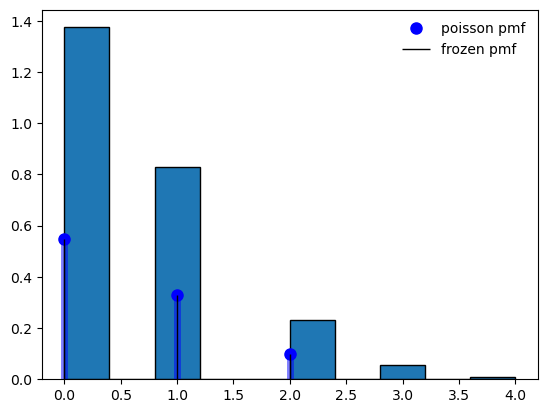

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Calculate the first four moments:
mu = 0.6

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
#Display the probability mass function (pmf):
x = np.arange(poisson.ppf(0.01, mu),

              poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)


#Freeze the distribution and display the frozen pmf:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,

        label='frozen pmf')

ax.legend(loc='best', frameon=False)


#Check accuracy of cdf and ppf:
prob = poisson.cdf(x, mu)

np.allclose(x, poisson.ppf(prob, mu))



#Generate random numbers:
r1 = poisson.rvs(mu, size=1000)
ax.hist(r1, density=True, edgecolor='black')

plt.show()

In [154]:
# b. Create a continious random variable with normal distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

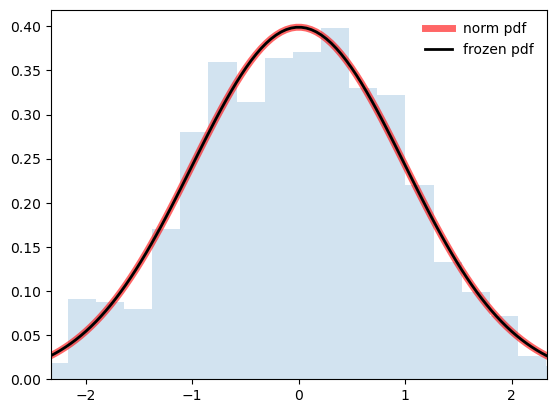

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Calculate the first four moments:
mean, var, skew, kurt = norm.stats(moments='mvsk')

#Display the probability density function (pdf):
x = np.linspace(norm.ppf(0.01),

                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),

       'r-', lw=5, alpha=0.6, label='norm pdf')

#Freeze the distribution and display the frozen pdf:
rv = norm()

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:
vals = norm.ppf([0.001, 0.5, 0.999])

np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

#Generate random numbers:
r2 = norm.rvs(size=1000)



#And compare the histogram:
ax.hist(r2, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

ax.set_xlim([x[0], x[-1]])

ax.legend(loc='best', frameon=False)

plt.show()

In [156]:
# c. Test if two sets of (independent) random data comes from the same distribution

In [160]:
ttest_ind(r1,r2, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=14.805577074295737, pvalue=3.863058732479667e-47)